In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os,cv2

In [54]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [55]:
train_dataset = train.flow_from_directory("training",
                                          target_size = (200,200),
                                          batch_size = 100,
                                          class_mode = 'binary'
)
validation_dataset =train.flow_from_directory("validation",
                                          target_size = (200,200),
                                          batch_size = 20,
                                          class_mode = 'binary')

Found 322 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [56]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(200,200,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [57]:
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(256,activation='relu'))
resnet_model.add(tf.keras.layers.Dense(1,activation='softmax'))

In [58]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               524544    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24,112,513
Trainable params: 524,801
Non-trainable params: 23,587,712
_________________________________________________________________


In [59]:
resnet_model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [60]:
model_fit = resnet_model.fit(train_dataset,
                     steps_per_epoch =3,
                     epochs = 30,
                     validation_data=validation_dataset,
                     verbose=1)

Epoch 1/30
3/3 - 36s - loss: 4.3849 - accuracy: 0.5631 - val_loss: 5.9307 - val_accuracy: 0.4906 - 36s/epoch - 12s/step
Epoch 2/30
3/3 - 32s - loss: 2.7530 - accuracy: 0.5946 - val_loss: 1.8776 - val_accuracy: 0.4906 - 32s/epoch - 11s/step
Epoch 3/30
3/3 - 26s - loss: 1.8995 - accuracy: 0.5541 - val_loss: 1.0353 - val_accuracy: 0.4906 - 26s/epoch - 9s/step
Epoch 4/30
3/3 - 27s - loss: 1.5883 - accuracy: 0.5946 - val_loss: 1.8698 - val_accuracy: 0.4906 - 27s/epoch - 9s/step
Epoch 5/30
3/3 - 23s - loss: 1.2197 - accuracy: 0.5586 - val_loss: 1.0364 - val_accuracy: 0.4906 - 23s/epoch - 8s/step
Epoch 6/30
3/3 - 28s - loss: 1.1501 - accuracy: 0.5733 - val_loss: 0.6404 - val_accuracy: 0.4906 - 28s/epoch - 9s/step
Epoch 7/30
3/3 - 26s - loss: 0.8250 - accuracy: 0.5541 - val_loss: 1.0640 - val_accuracy: 0.4906 - 26s/epoch - 9s/step
Epoch 8/30
3/3 - 33s - loss: 0.7384 - accuracy: 0.5733 - val_loss: 0.7090 - val_accuracy: 0.4906 - 33s/epoch - 11s/step
Epoch 9/30
3/3 - 28s - loss: 0.7480 - accurac

In [61]:
loss, accuracy = resnet_model.evaluate(train_dataset, verbose=1)
loss_v, accuracy_v = resnet_model.evaluate(validation_dataset, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

3/3 [==============================] - 5s 1s/step - loss: 0.5311 - accuracy: 0.4906
Validation: accuracy = 0.490566  ;  loss_v = 0.531088
Test: accuracy = 0.577640  ;  loss = 0.481413


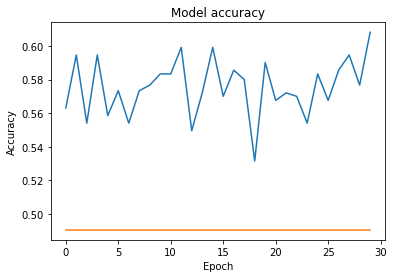

In [62]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

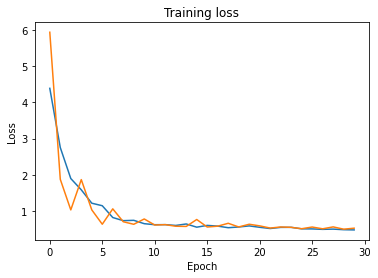

In [63]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [64]:
tf.saved_model.save(resnet_model,'resnet-50')

INFO:tensorflow:Assets written to: resnet-50\assets


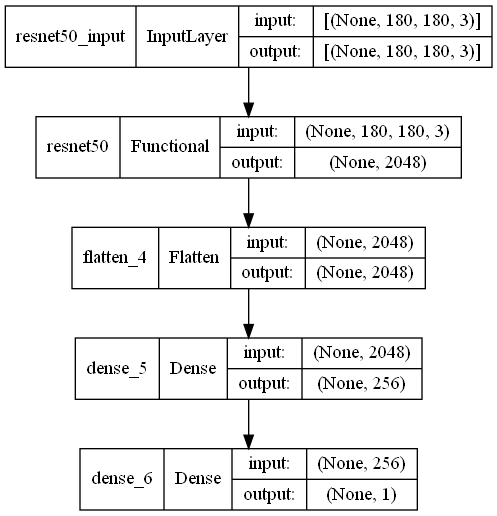

In [65]:
img_file = './model_arch1.png'
tf.keras.utils.plot_model(resnet_model, to_file=img_file, show_shapes=True, show_layer_names=True)